In [1]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle
import math

In [2]:
targetImageSize = 300.0  ### PARAMETER 1 - SETS SIZE OF SMALLEST IMAGE DIMENSION
targetRes = 32           ### PARAMETER 2 - CONTROLS THE SIZE OF THE TRAINING IMAGES
stride = 2               ### PARAMETER 3 - CONTROLS THE NUMBER OF SAMPLES PRODUCED

image_dim = 1

imageFolder = "box_data/images"
labelFolder = "box_data/lables"


files = os.listdir(imageFolder)
files.remove('.DS_Store')

print files

# dictionary to store the box images and label masks
imgs = {}

# dictionary to store image patches into both '0' (not corners) and '1' (corners) categories
dataSet = {}
dataSet[0] = []
dataSet[1] = []

for fileName in files[:3]:
    image = misc.imread("/".join([imageFolder, fileName]))
    label = misc.imread("/".join([labelFolder, fileName]))
    
    imgPair = []
    
    for img in [image, label]:

        if image_dim == 1 and len(img.shape) > 2: 
            img = img[:,:,0]

        fac = min(img.shape[0], img.shape[1]) / targetImageSize
        img = misc.imresize(img, (int(img.shape[0]/fac), int(img.shape[1]/fac)), interp='nearest')
        img = img / 255.0
        
        imgPair.append(img)
    
    xStep = int( math.floor( ( float(img.shape[0]) - targetRes ) / stride) )
    yStep = int( math.floor( ( float(img.shape[1]) - targetRes ) / stride) )
    
    for y in range(yStep):
        for x in range(xStep):

            # crop patch from image
            image_crop = imgPair[0][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]
            
            # calculate presence of corner from matching crop of label mask
            target_crop = imgPair[1][x * stride : (x * stride) + targetRes, y * stride : (y * stride) + targetRes]
            target = int ( round( np.max(target_crop) ) )
            
            dataSet[target].append(image_crop)
    
    imgs[fileName] = imgPair


# shuffle both data sets
for indx in [0,1]:
    random.shuffle(dataSet[indx])

# for training, we want the same number of image patches from both categories, 
# even though there will be far more patches without corners.
# here we calculate the length of the smaller data set
minSetLen = min(len(dataSet[0]), len(dataSet[1]))
print "smallest set size:", minSetLen

# then we combine an equal number of patches from both categories into one data set
data = []
for indx in [0,1]:
    for d in dataSet[indx][:minSetLen]:
        data.append([d, indx])

# and shuffle the entire data set one more time
random.shuffle(data)
        
print "num samples:", len(data)

['001.jpg', '002.jpg', '003.jpg', '004.jpg', '005.jpg', '006.jpg', '007.jpg', '008.jpg', '009.jpg', '010.jpg', '011.jpg', '012.jpg', '013.jpg']
smallest set size: 3903
num samples: 7806


image dimensions: (300, 402)


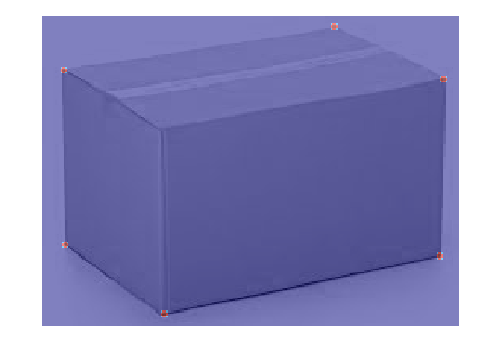

In [3]:
# preview one of the base images with the label mask overlayed

import scipy.misc

imgName = "003.jpg"
print "image dimensions:", imgs[imgName][0].shape

imshow(imgs[imgName][0], cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')

plt.hold(True)

imshow(imgs[imgName][1], vmin = 0, vmax = 1, alpha=.5, interpolation='nearest')

plt.axis('off')
plt.show()

image dimensions: (32, 32)
Value: 0


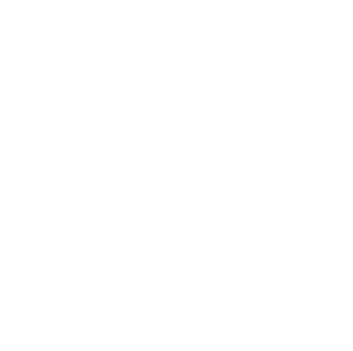

In [4]:
# preview one sample to make sure everything worked as expected

img_index = 19

img = data[img_index][0]
print "image dimensions:", img.shape
print "Value:", (data[img_index][1])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [5]:
# build X and y datasets for training

X = np.ndarray((len(data), targetRes, targetRes), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

In [6]:
# export data to external file

pickle_file = '-data.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X': X,
        'y': y,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size

Saved data to -data.pickle
Compressed pickle size: 32004857


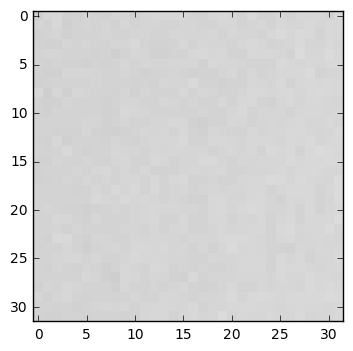

In [7]:
# preview one sample from the final X dataset to make sure nothing happened along the way

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

img_num = 900
img = X[img_num]
imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')